In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loan_data = pd.read_csv(r'C:\Users\janan\Downloads\Loan Repayment Prediction using Decision Tree & Random Forest\loan_borowwer_data.csv')

In [3]:
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
loan_data['not.fully.paid'].unique()

array([0, 1], dtype=int64)

#### checking for missing values within the dataset

In [5]:
loan_data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

#### Reversing the outputs for the target

In [6]:
def reverseoutput(s):
    if s == 1:
        return 0
    else:
        return 1

In [7]:
loan_data['paid_status']=loan_data['not.fully.paid'].map(reverseoutput)

In [8]:
loan_data = loan_data.drop(['not.fully.paid'], axis = 1)

In [9]:
loan_data.head(7)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,paid_status
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,1
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,1
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,1
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,1
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,0


#### Breakup of number of people who repaid vs people who did not repay

<AxesSubplot:>

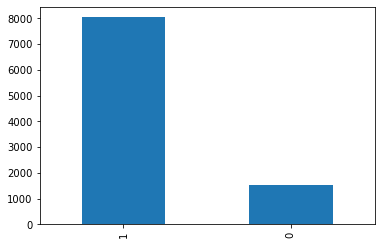

In [10]:
loan_data['paid_status'].value_counts().plot.bar()

#### Visualizing the purpose for which loan was taken

<AxesSubplot:>

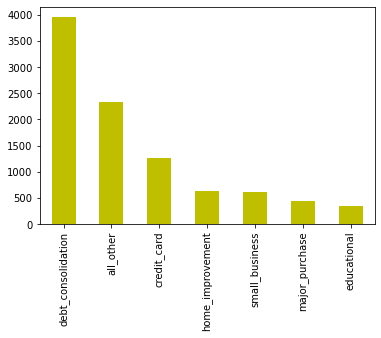

In [11]:
#most people get loan attributing to the "debt_consolidation" reason
loan_data['purpose'].value_counts().plot.bar(color ='y')

In [12]:
group_by = loan_data.groupby('paid_status')
df=group_by.get_group('paid_status'==0)

#### Visualizing installment rate distribution for those who did not repay the loan

<AxesSubplot:>

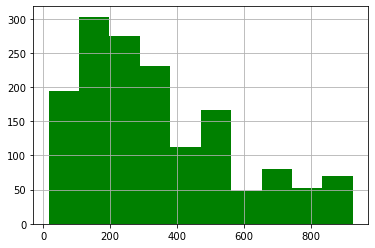

In [13]:
df['installment'].hist(bins=10,color='g')

#### Converting the purpose to input vectors by label encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

loan_data['purpose']=label_encoder.fit_transform(loan_data['purpose'])

In [15]:
Y = loan_data['paid_status']

In [16]:
loan_data = loan_data.drop(['paid_status'],axis =1)

In [17]:
loan_data.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec'],
      dtype='object')

In [18]:
X = loan_data.values

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state =1)

In [20]:
from sklearn.tree import DecisionTreeClassifier
print(x_train.shape)

(7662, 13)


In [21]:
classifier = DecisionTreeClassifier()

classifier.fit(x_train,y_train)

y_predict = classifier.predict(x_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_predict,y_test)

print(accuracy)

0.7416492693110647


In [22]:
from sklearn.ensemble import RandomForestClassifier

rand_classifier = RandomForestClassifier()

rand_classifier.fit(x_train, y_train)

y_rand_predict = rand_classifier.predict(x_test)

rand_accuracy = accuracy_score(y_rand_predict, y_test)

print(rand_accuracy)

0.8288100208768268
